In [2]:
import pandas as pd
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn
import os
import sys
import math

import eos_data
import integration
sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots

In [3]:
def get_radii_sq(square_size):
    radii = set()
    for i in range(2):
        y = square_size
        x = square_size - i
        while x ** 2 + y ** 2 > (square_size - 1) ** 2:
            radii.add(x ** 2 + y ** 2)
            x -= 1
            y -= 1
    radii.add(square_size ** 2)
    return sorted(list(radii), key=float, reverse=True)

print(get_radii_sq(60))
print(list([math.sqrt(x) for x in get_radii_sq(60)]))
print(60 * math.sqrt(2))

[7200, 7081, 6962, 6845, 6728, 6613, 6498, 6385, 6272, 6161, 6050, 5941, 5832, 5725, 5618, 5513, 5408, 5305, 5202, 5101, 5000, 4901, 4802, 4705, 4608, 4513, 4418, 4325, 4232, 4141, 4050, 3961, 3872, 3785, 3698, 3613, 3600, 3528]
[84.8528137423857, 84.1486779456457, 83.43860018001261, 82.73451516749222, 82.02438661763951, 81.32035415564789, 80.61017305526642, 79.90619500389191, 79.19595949289332, 78.49203781276162, 77.78174593052023, 77.07788269017254, 76.36753236814714, 75.66372975210778, 74.95331880577403, 74.24957912338628, 73.53910524340094, 72.83543093852057, 72.12489168102785, 71.42128534267638, 70.71067811865476, 70.00714249274856, 69.29646455628166, 68.59300255857006, 67.88225099390856, 67.17886572427373, 66.46803743153546, 65.76473218982953, 65.05382386916237, 64.35060217278468, 63.63961030678928, 62.93647591023825, 62.22539674441618, 61.5223536610881, 60.81118318204309, 60.108235708594876, 60.0, 59.39696961966999]
84.8528137423857


In [2]:
def make_bootstrap(df):
    result = []
    for n in [100, 1000, 10000, 100000]:
        df1 = df.groupby('beta').apply(integration.generate_bootstrap, n).reset_index(level='beta')
        df1 = df1.groupby('n').apply(integration.integrate_S_simpson).reset_index(level='n')
        result.append(df1['energy'].agg(['mean', 'std']).to_frame().T.reset_index(drop=True))
        result[-1]['n'] = n
    return pd.concat(result)

In [3]:
path = '../../result/eos_high_precision/5x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df = []
df.append(eos_data.read_S(path))
df[-1]['T'] = 'T'
path = '../../result/eos_high_precision/30x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df.append(eos_data.read_S(path))
df[-1]['T'] = '0'
df = pd.concat(df)
df1 = df[df['T'] == 'T']
df1.loc[:,'T'] = 'diff'
df1.loc[:,'S'] = df1.loc[:,'S'] - df.loc[df['T'] == '0', 'S']
df1.loc[:,'S_err'] = np.sqrt(df1.loc[:,'S_err']**2 + df.loc[df['T'] == '0','S_err']**2)
print(integrate.cumulative_simpson(df1['S'], x = df1['beta']))

[ 3.15258253e-07  1.89918009e-07 -1.75936932e-06 -7.08086140e-06
 -1.13014272e-05 -1.77443308e-05  2.18209220e-04  2.07544063e-04
  1.86945862e-04  1.64178219e-04  1.39840608e-04  1.14407040e-04
  4.79150843e-05 -2.05719320e-05 -1.58969602e-04 -2.94885174e-04
 -5.44968601e-04 -7.65141563e-04 -1.11734827e-03 -1.37771706e-03
 -1.57587349e-03 -1.72551481e-03 -1.84250040e-03 -1.93532052e-03
 -2.00710269e-03 -2.06503098e-03 -2.11387638e-03 -2.15381586e-03]


In [4]:
a = 4.160
b = 4.204
h = (b-a)/2
f_a = -0.000241
f_b = -0.000622
f_m = -0.000241
integral = h * (f_a + 4 * f_m + f_b)/3
print('integral = ', integral)

integral =  -1.3397999999999876e-05


     beta         S     S_err     T
0   3.920  0.000061  0.000054  diff
1   3.960 -0.000021  0.000058  diff
2   4.000  0.000038  0.000047  diff
3   4.040 -0.000113  0.000048  diff
4   4.080 -0.000130  0.000043  diff
5   4.120 -0.000107  0.000037  diff
6   4.160 -0.000241  0.000034  diff
7   4.200 -0.000622  0.000042  diff
8   4.204 -0.004838  0.000051  diff
9   4.208 -0.005441  0.000046  diff
10  4.212 -0.005922  0.000043  diff
11  4.216 -0.006234  0.000028  diff
12  4.220 -0.006470  0.000040  diff
13  4.230 -0.006789  0.000038  diff
14  4.240 -0.006869  0.000029  diff
15  4.260 -0.006914  0.000028  diff
16  4.280 -0.006621  0.000028  diff
17  4.320 -0.005881  0.000025  diff
18  4.360 -0.005126  0.000025  diff
19  4.440 -0.003754  0.000023  diff
20  4.520 -0.002830  0.000019  diff
21  4.600 -0.002149  0.000021  diff
22  4.680 -0.001617  0.000022  diff
23  4.760 -0.001310  0.000018  diff
24  4.840 -0.001013  0.000014  diff
25  4.920 -0.000796  0.000018  diff
26  5.000 -0.000666  0.00002

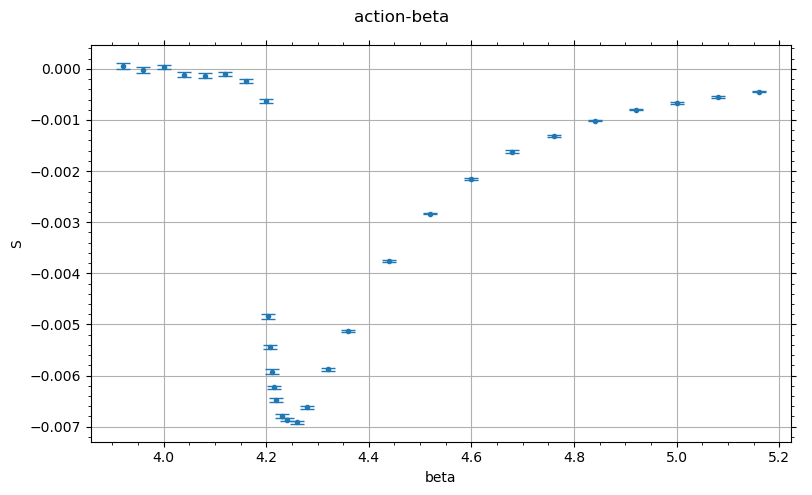

cutoff:  4.08


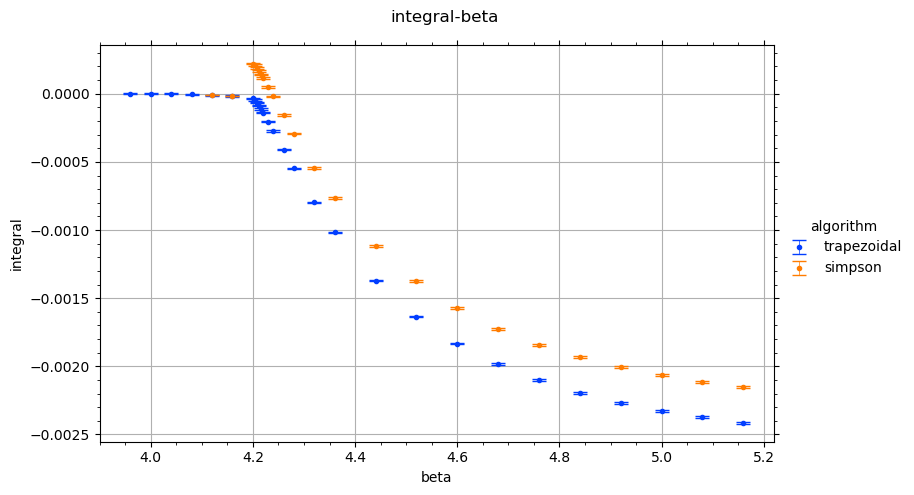

cutoff:  4.12


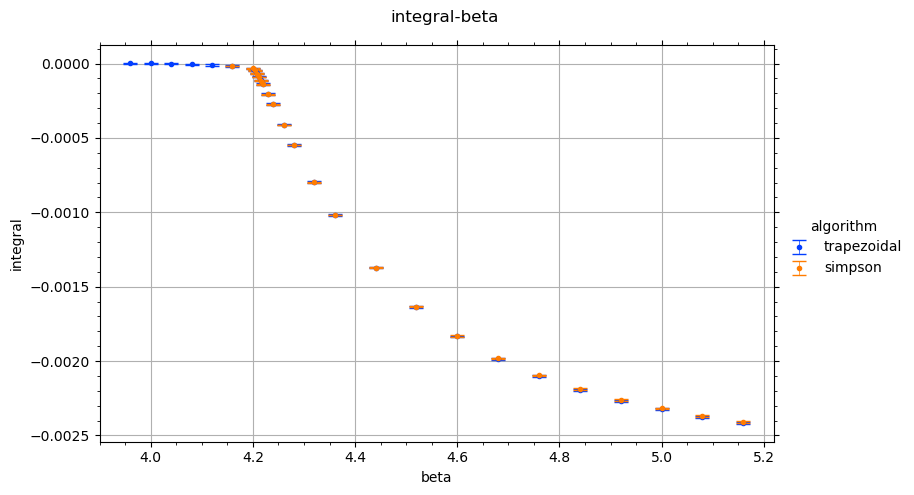

cutoff:  4.16


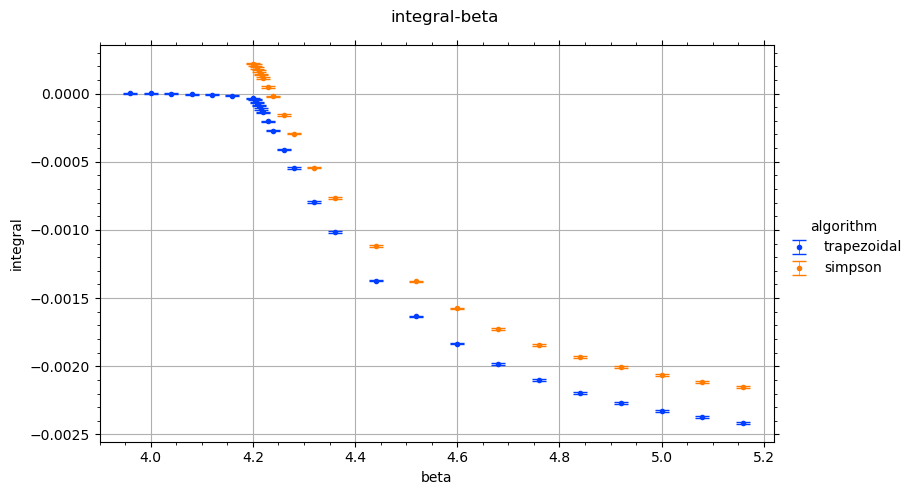

cutoff:  4.2


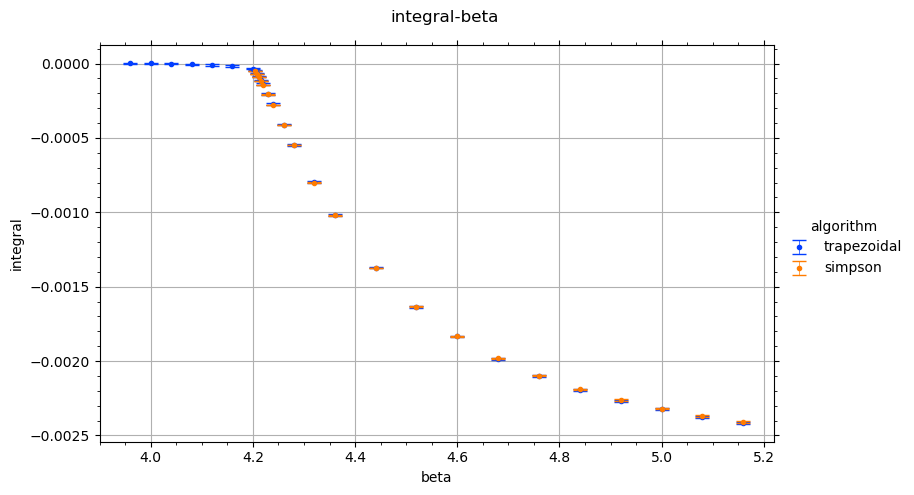

cutoff:  4.204


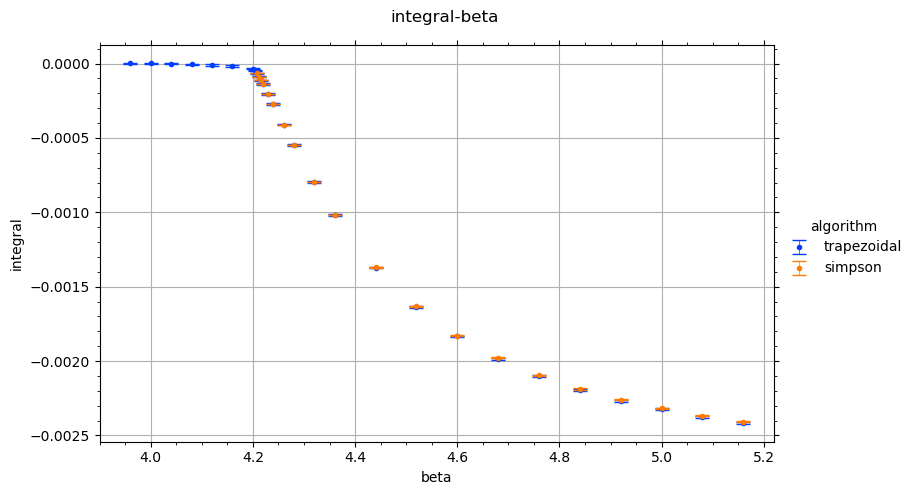

cutoff:  4.208


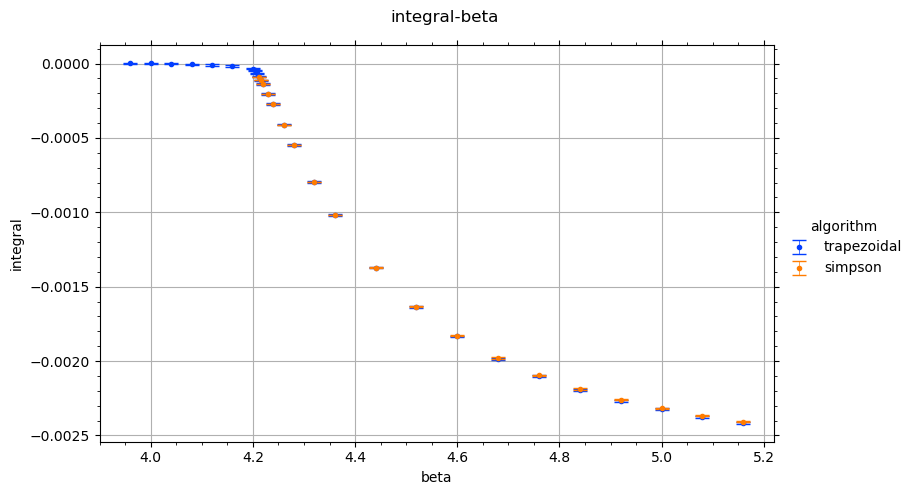

cutoff:  4.212


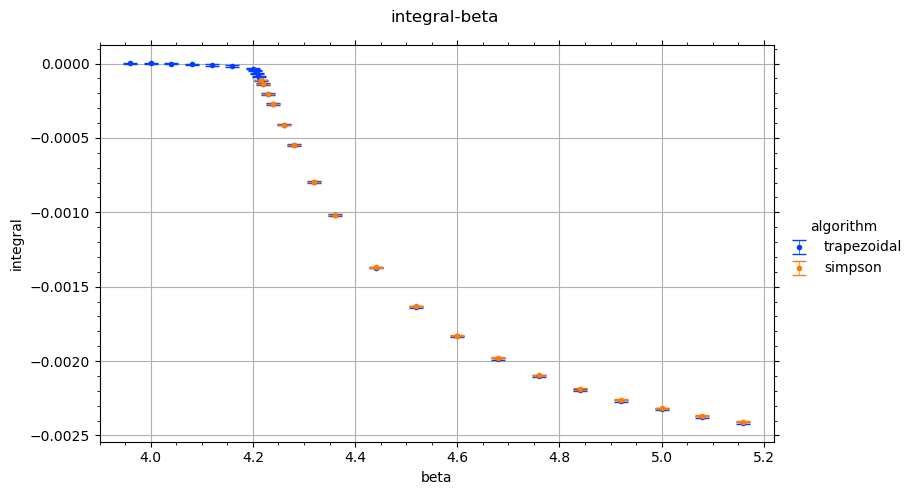

cutoff:  4.216


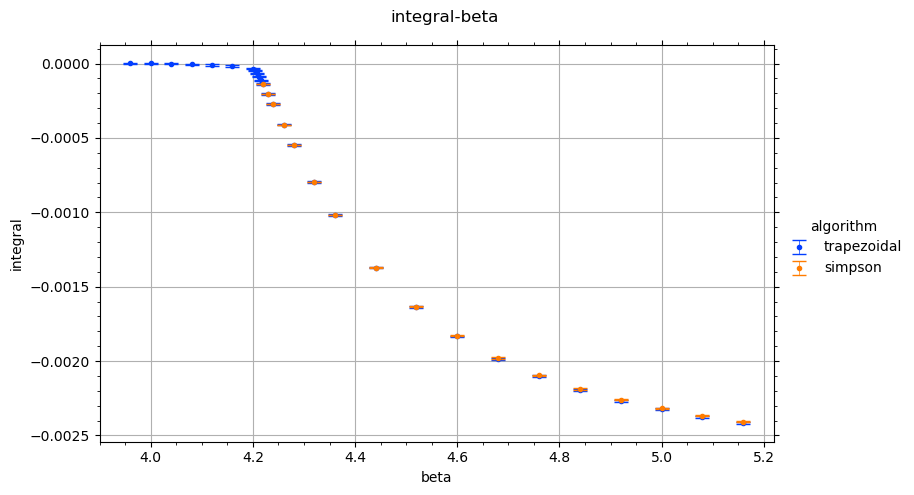

cutoff:  4.22


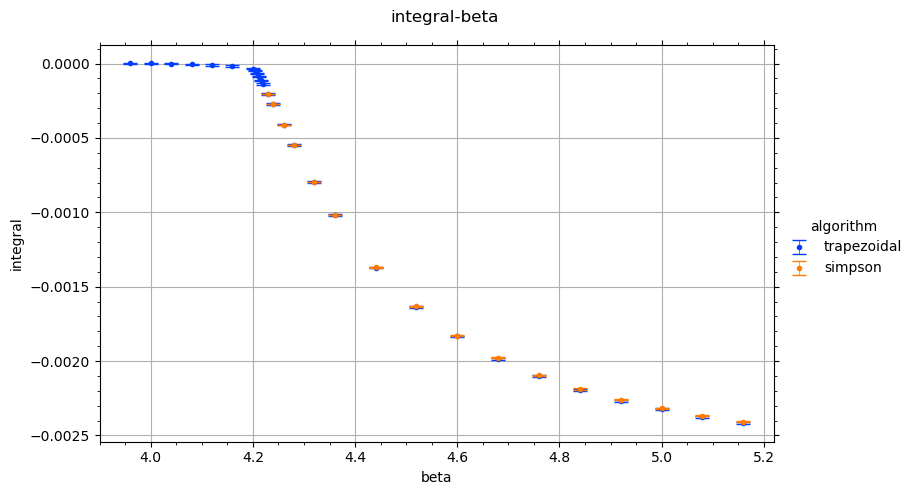

cutoff:  4.23


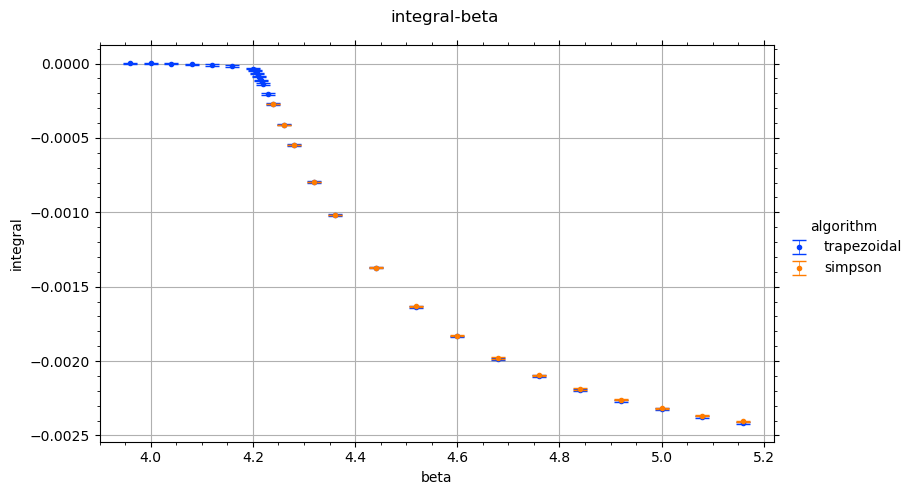

cutoff:  4.24


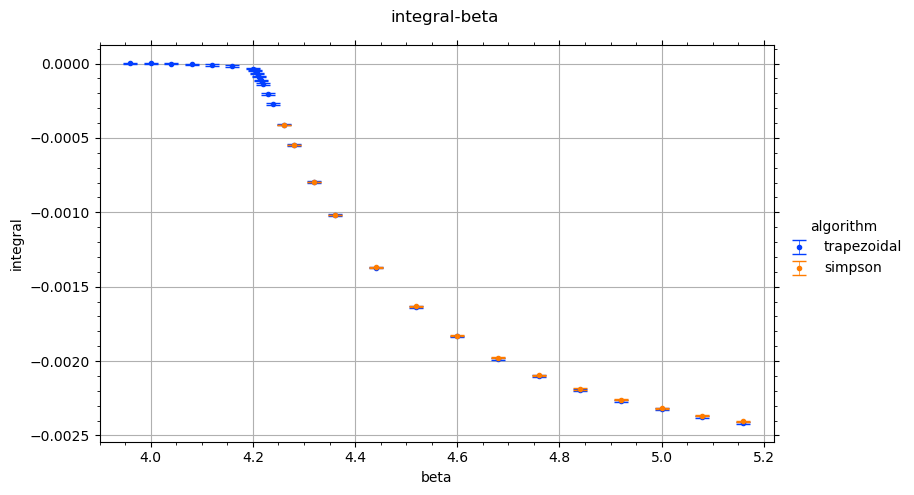

cutoff:  4.26


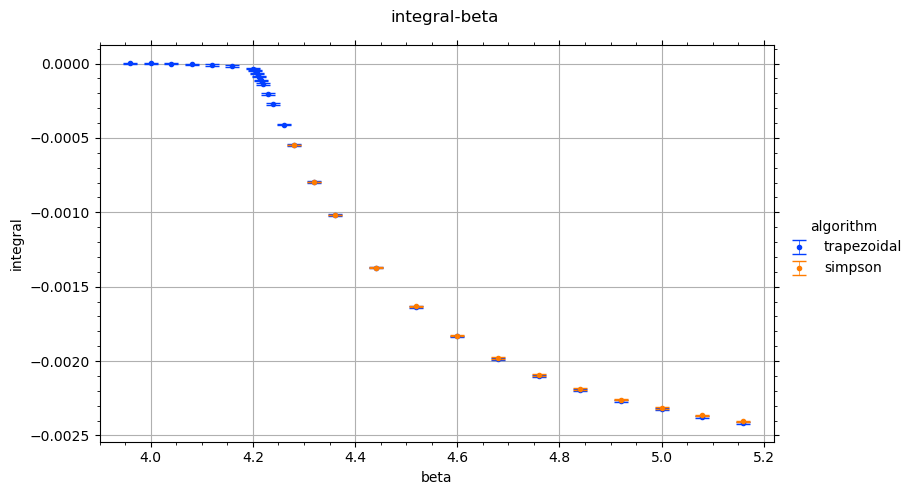

cutoff:  4.28


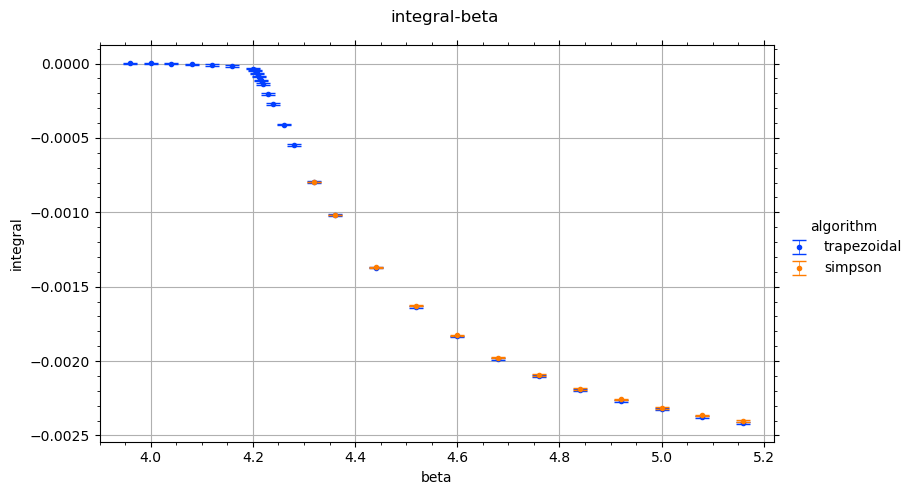

cutoff:  4.32


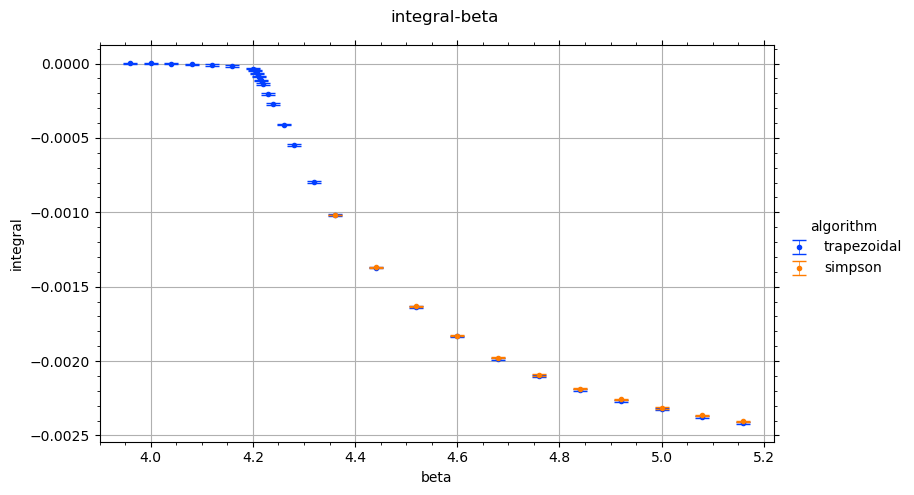

cutoff:  4.36


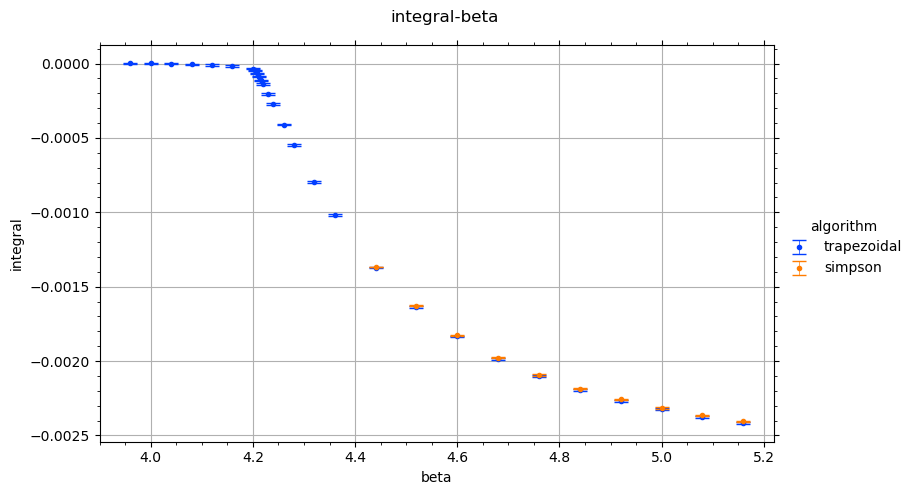

cutoff:  4.44


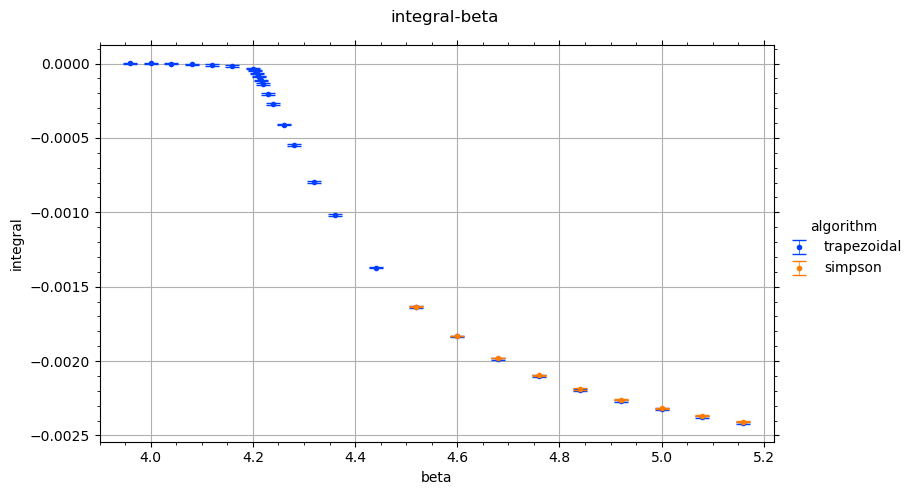

cutoff:  4.52


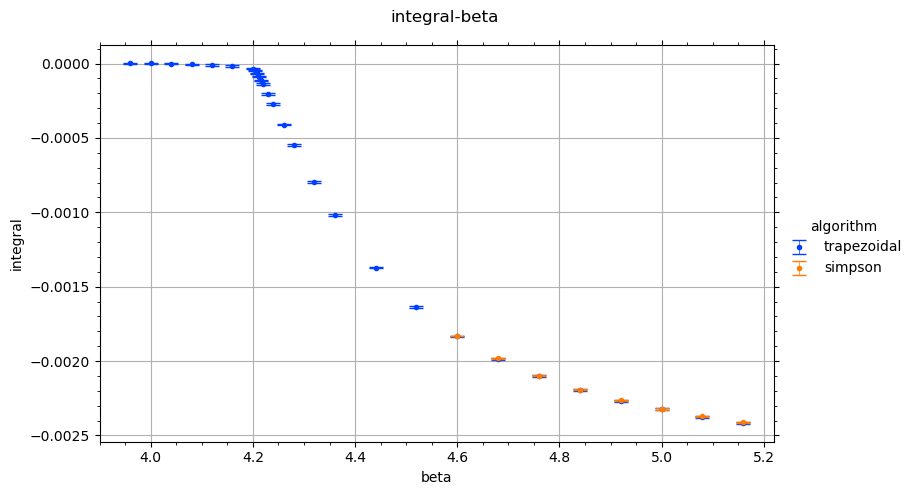

cutoff:  4.6


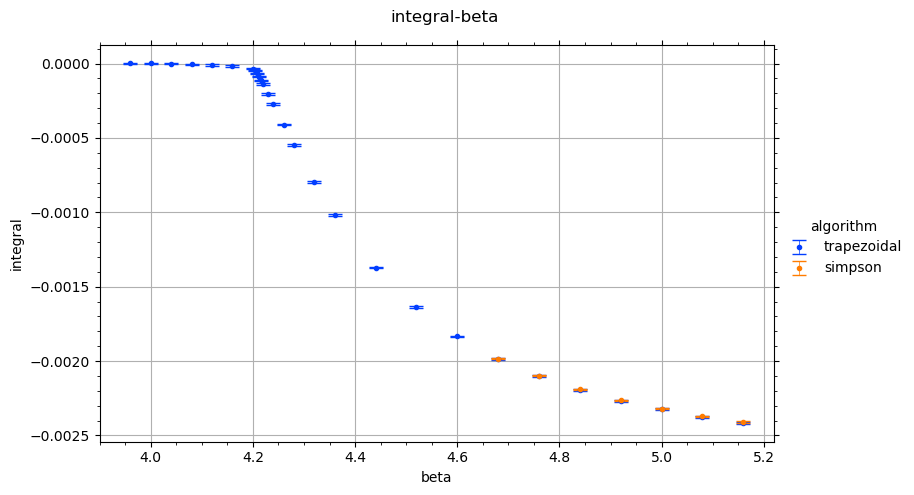

cutoff:  4.68


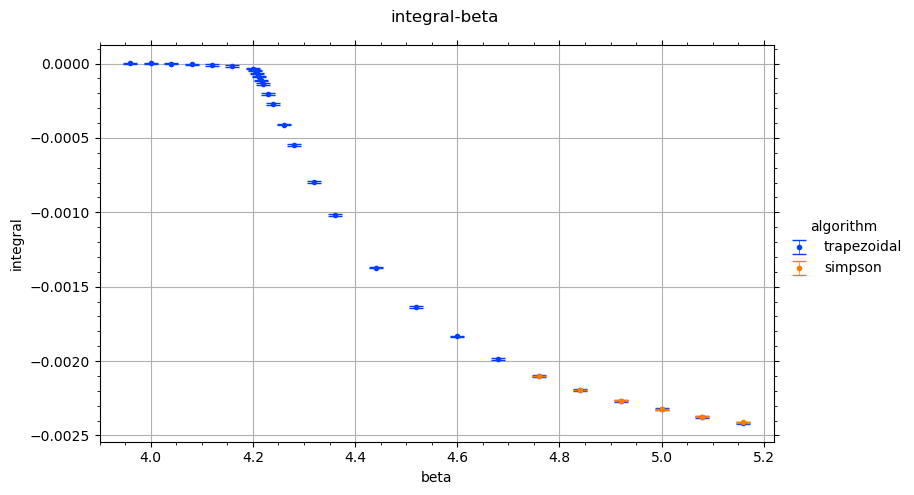

cutoff:  4.76


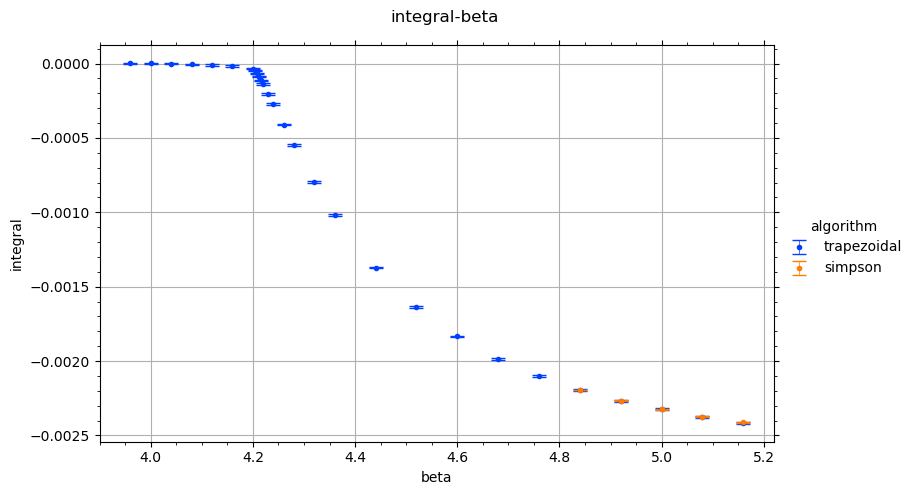

cutoff:  4.84


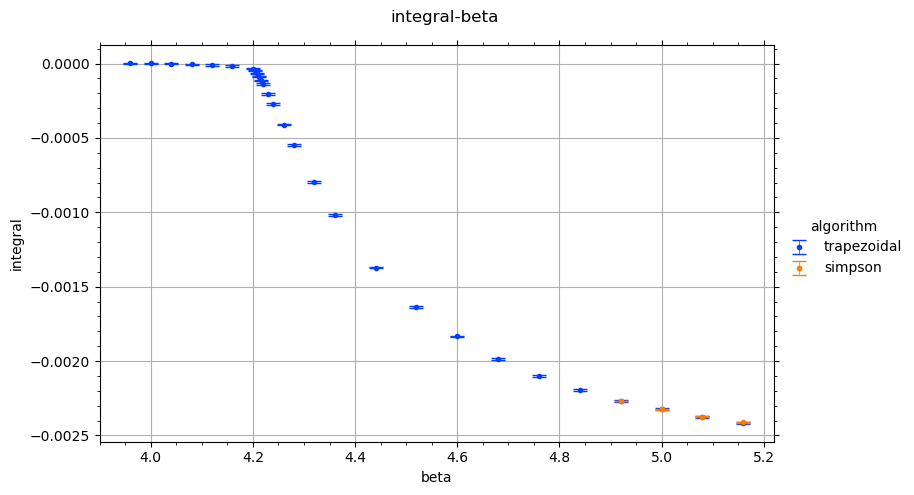

In [25]:
path = '../../result/eos_high_precision/5x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df = []
df.append(eos_data.read_S(path))
df[-1]['T'] = 'T'
path = '../../result/eos_high_precision/30x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df.append(eos_data.read_S(path))
df[-1]['T'] = '0'
df = pd.concat(df)
df1 = df[df['T'] == 'T']
df1.loc[:,'T'] = 'diff'
df1.loc[:,'S'] = df1.loc[:,'S'] - df.loc[df['T'] == '0', 'S']
df1.loc[:,'S_err'] = np.sqrt(df1.loc[:,'S_err']**2 + df.loc[df['T'] == '0','S_err']**2)
print(df1)
plots.make_plot(df1, 'beta', 'S', None, 'beta', 'S', 'action-beta', None, None, True, err='S_err')
df2 = df1.groupby('beta').apply(integration.generate_bootstrap, 1000).reset_index(level='beta')
cutoff_arr = df2[(df2['beta'] > 4.040) & (df2['beta'] < 4.920)]['beta'].unique()
for cutoff in cutoff_arr:
    print('cutoff: ', cutoff)
    df3 = []
    df3.append(df2.groupby('n').apply(integration.integrate_S, integrate.cumulative_trapezoid).reset_index(level='n'))
    df3[-1]['algorithm'] = 'trapezoidal'
    df3.append(df2[df2['beta'] >= cutoff].groupby('n').apply(integration.integrate_S, integrate.cumulative_simpson).reset_index(level='n'))
    df3[-1]['algorithm'] = 'simpson'
    df3 = pd.concat(df3)
    # plots.plot_potential_single(df3, 'beta', 'energy', 'n', 'beta', 'S', 'action-beta', None, None, True)
    df3 = df3.groupby(['beta', 'algorithm']).agg(integral=('energy', 'mean'), err=('energy', 'std')).reset_index(level=['beta', 'algorithm'])
    # df3 = df3[df3['algorithm'] == 'simpson']
    df3.loc[df3['algorithm'] == 'simpson', 'integral'] = df3.loc[df3['algorithm'] == 'simpson', 'integral'] + df3.loc[(df3['beta'] == cutoff) & (df3['algorithm'] == 'trapezoidal'), 'integral'].values[0]
    # print(df3)
    plots.make_plot(df3, 'beta', 'integral', 'algorithm', 'beta', 'integral', 'integral-beta', None, None, True, err='err')

     beta         S     S_err     T
0   3.920  0.000061  0.000054  diff
1   3.960 -0.000021  0.000058  diff
2   4.000  0.000038  0.000047  diff
3   4.040 -0.000113  0.000048  diff
4   4.080 -0.000130  0.000043  diff
5   4.120 -0.000107  0.000037  diff
6   4.160 -0.000241  0.000034  diff
7   4.200 -0.000622  0.000042  diff
8   4.204 -0.004838  0.000051  diff
9   4.208 -0.005441  0.000046  diff
10  4.212 -0.005922  0.000043  diff
11  4.216 -0.006234  0.000028  diff
12  4.220 -0.006470  0.000040  diff
13  4.230 -0.006789  0.000038  diff
14  4.240 -0.006869  0.000029  diff
15  4.260 -0.006914  0.000028  diff
16  4.280 -0.006621  0.000028  diff
17  4.320 -0.005881  0.000025  diff
18  4.360 -0.005126  0.000025  diff
19  4.440 -0.003754  0.000023  diff
20  4.520 -0.002830  0.000019  diff
21  4.600 -0.002149  0.000021  diff
22  4.680 -0.001617  0.000022  diff
23  4.760 -0.001310  0.000018  diff
24  4.840 -0.001013  0.000014  diff
25  4.920 -0.000796  0.000018  diff
26  5.000 -0.000666  0.00002

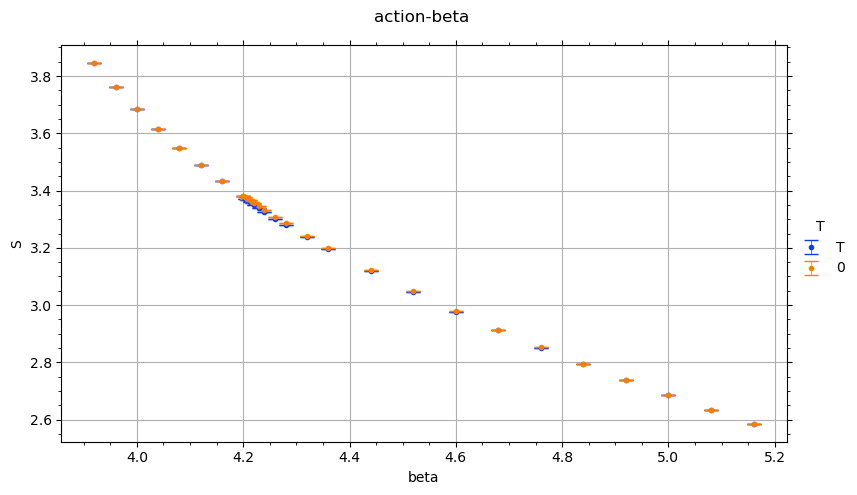

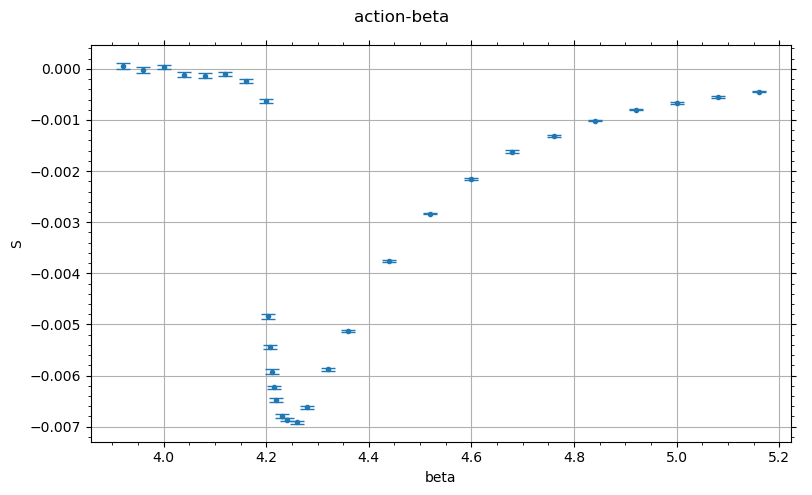

simpson:  -0.0021538158576234977
      beta         S      n
0     3.92  0.000035      1
1     3.92  0.000051      2
2     3.92  0.000051      3
3     3.92  0.000040      4
4     3.92  0.000034      5
...    ...       ...    ...
9995  5.16 -0.000448   9996
9996  5.16 -0.000439   9997
9997  5.16 -0.000439   9998
9998  5.16 -0.000430   9999
9999  5.16 -0.000404  10000

[290000 rows x 3 columns]


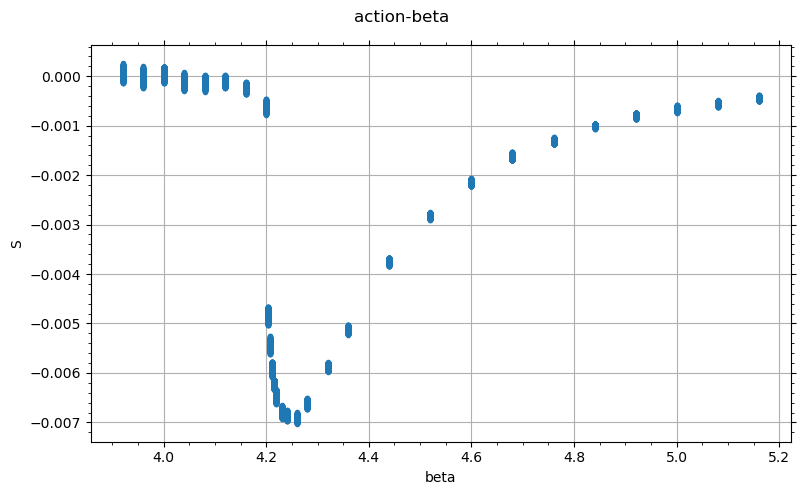

        n    energy
0       1 -0.002155
0       2 -0.002156
0       3 -0.002152
0       4 -0.002162
0       5 -0.002160
..    ...       ...
0    9996 -0.002153
0    9997 -0.002141
0    9998 -0.002157
0    9999 -0.002149
0   10000 -0.002162

[10000 rows x 2 columns]


/home/ilya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


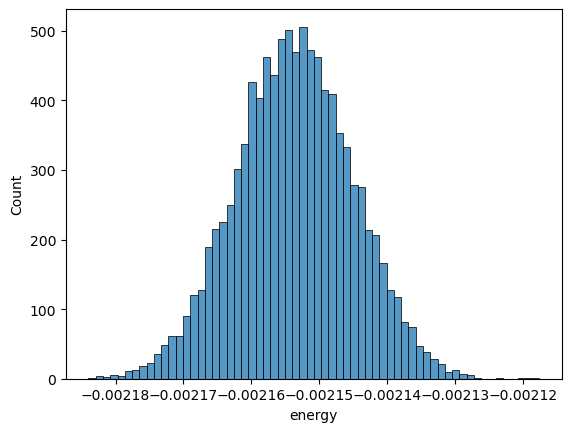

       mean       std
0 -0.002154  0.000009
       mean       std       n
0 -0.002155  0.000009     100
0 -0.002154  0.000009    1000
0 -0.002154  0.000009   10000
0 -0.002154  0.000009  100000


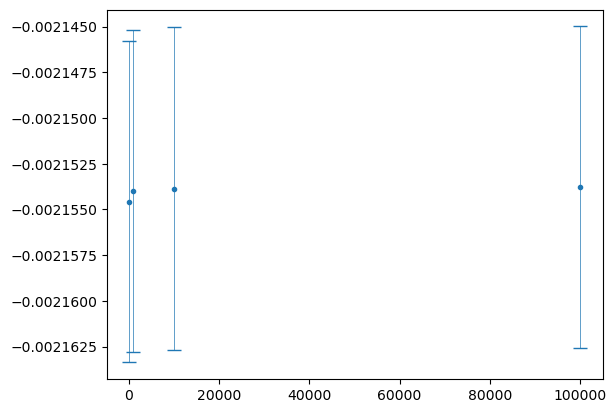

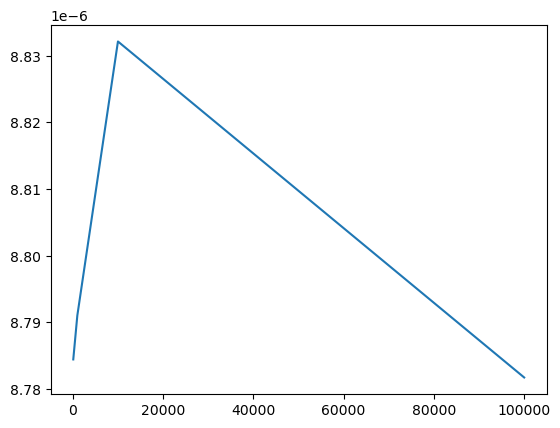

In [ ]:
path = '../../result/eos_high_precision/5x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df = []
df.append(eos_data.read_S(path))
df[-1]['T'] = 'T'
path = '../../result/eos_high_precision/30x30x121sq/PBC_cV/0.000000v/beta_actS.txt'
df.append(eos_data.read_S(path))
df[-1]['T'] = '0'
df = pd.concat(df)
# print(df)
df1 = df[df['T'] == 'T']
df1['T'] = 'diff'
df1['S'] = df1['S'] - df[df['T'] == '0']['S']
df1['S_err'] = np.sqrt(df1['S_err']**2 + df[df['T'] == '0']['S_err']**2)
print(df1)
# print(integrate.cumulative_simpson(df['S'], x = df['beta']))
plots.plot_potential_single(df, 'beta', 'S', 'T', 'beta', 'S', 'action-beta', None, None, True, err='S_err')
plots.plot_potential_single(df1, 'beta', 'S', None, 'beta', 'S', 'action-beta', None, None, True, err='S_err')
print('simpson: ', integrate.simpson(df1['S'], x = df1['beta']))
# test_sample = np.random.default_rng().normal(df1.loc[9, 'S'], df1.loc[9, 'S_err'], 10000000)
# seaborn.histplot(test_sample)
df2 = df1.groupby('beta').apply(integration.generate_bootstrap, 10000).reset_index(level='beta')
print(df2)
plots.plot_potential_single(df2, 'beta', 'S', None, 'beta', 'S', 'action-beta', None, None, True, err=None)
df3 = df2.groupby('n').apply(integration.integrate_S_simpson).reset_index(level='n')
print(df3)
seaborn.histplot(df3['energy'])
plt.show()
print(df3['energy'].agg(['mean', 'std']).to_frame().T.reset_index(drop=True))
df4 = make_bootstrap(df1)
print(df4)
plt.errorbar(df4['n'], df4['mean'], df4['std'], mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None)

plt.show()
plt.plot(df4['n'], df4['std'])
plt.show()